# Классификация кошка/собака по фотографии

In [55]:
import numpy
import matplotlib.pyplot as plt
import os, sys
import cv2
from tqdm import tqdm
import random

In [43]:
DATADIR = "C:/DATA/Kaggle/PetImages/"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 100

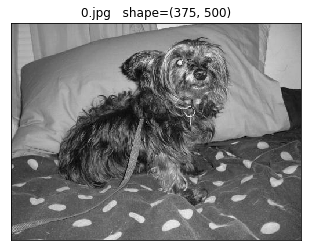

In [48]:
# проверка работа цикла по папкам Dog и Cat, показываем первую картинку
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.title(f"{img}   shape={img_array.shape}")
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        plt.show()
        break
    break

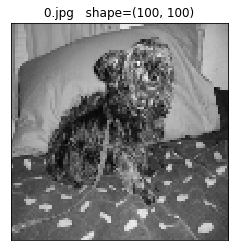

In [49]:
# меняем размер картинки, чтобы унифицировать подаваемую на вход информацию
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.title(f"{img}   shape={new_array.shape}")
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

## Перестроение входного набора данных

In [50]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [51]:
training_data = []
create_training_data()
print(f"кол-во обработанных картинок: {len(training_data)}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:11<00:00, 1101.31it/s]


кол-во обработанных картинок: 24946


In [83]:
# выводим значения 10 первых пикселей картинки и классификатор: 0-собака, 1-кошка
for x in training_data[:6]:
    print(x[0][0][:10], x[1])

[255 255 255 255 255 255 255 255 255 255] 1
[ 65  47  44  75  74 100 116 131 141 160] 1
[207 220 222 223 217 216 221 215 219 227] 1
[62 54 60 59 56 65 63 57 73 46] 0
[215 168 175 177 171 179 179 188 181 177] 0
[61 26 30 29 29 28 28 28 29 30] 1


## Перетасовка набора

In [73]:
random.shuffle(training_data)

In [74]:
for x in training_data[:10]:
    print(x[1])

1
1
1
0
0
1
1
1
0
1
